Surname and Name: VO CUONG\
Student ID: 131116

<b> Project: Using LSTM-RNN to predict the GDP of Poland </b>

### Abstract:

### Approach Selection

In this report, I chose the approach to analyse and predict the GDP of Poland. I used RNN-LSTM model to deal with the time-series data.
1. sequence_length: Decide base on the knowledge understand and the MA component in ARIMA model 
2. Due to the size of the data, I decided to keep the LSTM model hidden layer as 50 and Dense as 1 layer due to it is regression task

### Model Implementation

Using Python to implement the model\
With following library:
1. pandas, numpy for data transformation
2. scikit_learn for train, test split
3. tensorflow for RNN, LSTM
4. matplotlib for plotting

#### Library import and technical information

Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

2025-01-26 22:50:01.285703: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 22:50:01.800249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-26 22:50:01.994889: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-26 22:50:02.029559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 22:50:02.423488: I tensorflow/core/platform/cpu_feature_guar

Data import

I used Min Max Scaler to normalize the data in order to fit with the RNN-LSTM model

In [2]:
# Read the data
file_path = "poland_gdp.csv"
df = pd.read_csv(file_path)
df = df.sort_values(by="year")

gdp = df["amount"].values
gdp = gdp.reshape(-1, 1)

scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(gdp)

Using ARIMA technique identify the <b> sequence_length </b>

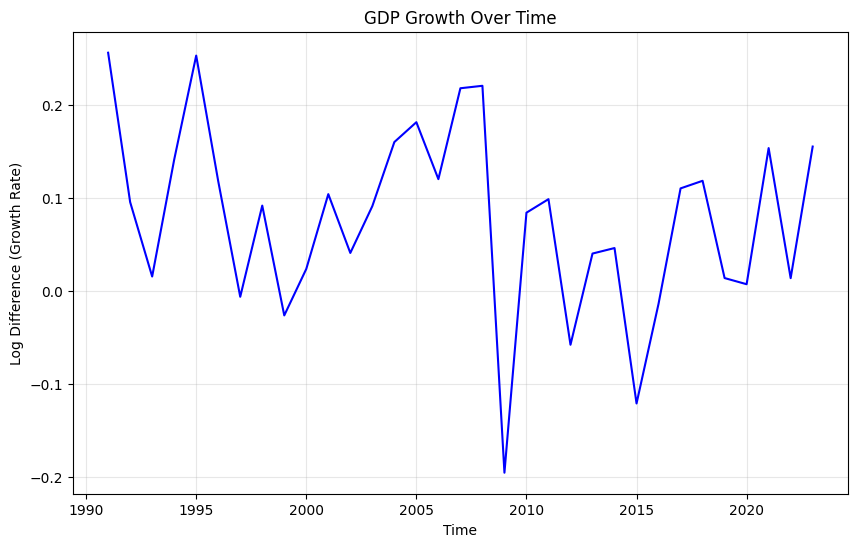

In [3]:
df_arima = df
df_arima["log_gdp"] = np.log(df_arima["amount"])
df_arima["growth"] = df_arima["log_gdp"].diff()

df_arima = df_arima.dropna()

plt.figure(figsize=(10, 6))
plt.plot(df_arima["year"], df_arima["growth"], color='blue')
plt.title("GDP Growth Over Time")
plt.xlabel("Time")
plt.ylabel("Log Difference (Growth Rate)")
plt.grid(alpha=0.3)
plt.show()

I used ARIMA model in order to identify the <b> sequence_length </b>. As we can see in the ACF chart under, lag = 8 is statistic significant so I decided to choose <b> sequence_length = 8 </b>.

<Figure size 1000x600 with 0 Axes>

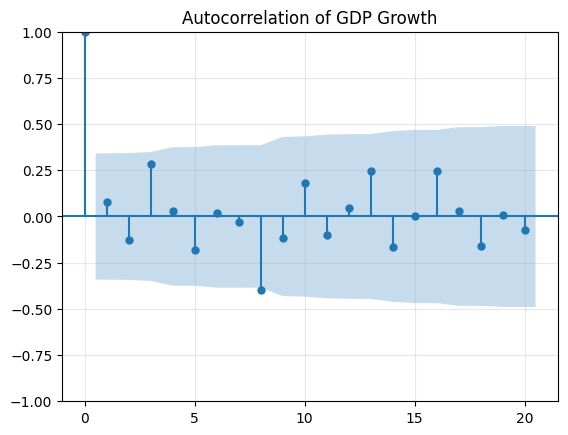

In [4]:
plt.figure(figsize=(10, 6))
plot_acf(df_arima["growth"], lags=20)
plt.title("Autocorrelation of GDP Growth")
plt.grid(alpha=0.3)
plt.show()

Plot the data

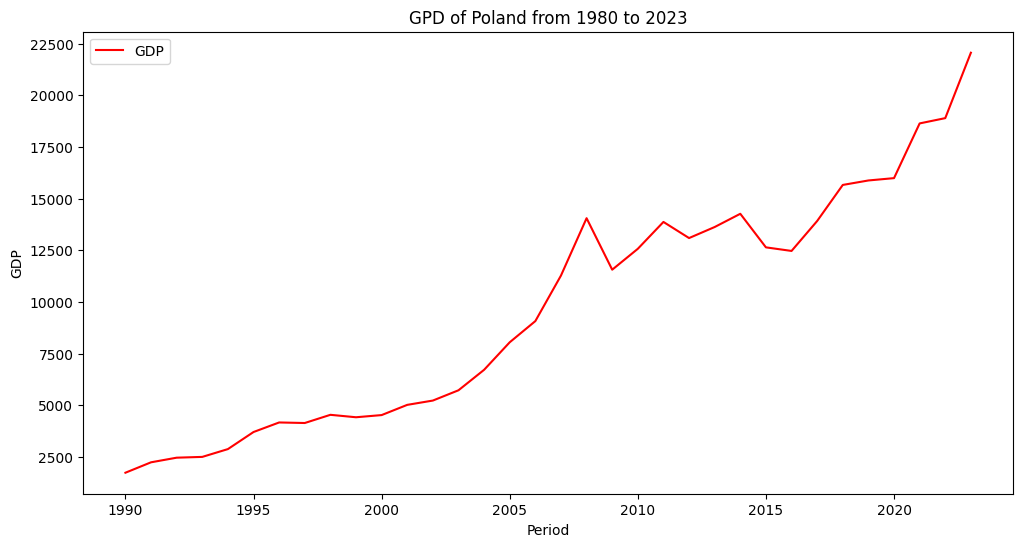

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["amount"], linestyle='-', color='r', label="GDP")
plt.legend()
plt.title('GPD of Poland from 1980 to 2023')
plt.xlabel('Period')
plt.ylabel('GDP')
plt.show()

RNN & LSTM implementation

In [6]:
# Prepare the sequences
sequence_length = 8  # Choose a sequence length
X = []
y = []

for i in range(sequence_length, len(gdp_scaled)):
    X.append(gdp_scaled[i-sequence_length:i])  # Previous sequence_length GDP values
    y.append(gdp_scaled[i])                   # Target is the next value

X, y = np.array(X), np.array(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

I0000 00:00:1737928239.282505   99788 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737928239.832402   99788 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737928239.832600   99788 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737928239.838536   99788 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1737928239.838625   99788 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Train the model

In the model, I decided to use ADAM as an optimizer and the loss function will be mean squared error to measure the error.

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

Epoch 1/50


I0000 00:00:1737928247.379663  100179 service.cc:146] XLA service 0x7fd8440154d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737928247.379775  100179 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-01-26 22:50:47.433220: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-26 22:50:50.229393: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


1/2 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.1658

I0000 00:00:1737928254.702450  100179 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1552 - val_loss: 0.4319
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1384 - val_loss: 0.4024
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1317 - val_loss: 0.3738
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1171 - val_loss: 0.3462
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1067 - val_loss: 0.3181
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0927 - val_loss: 0.2895
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0868 - val_loss: 0.2606
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0768 - val_loss: 0.2311
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0650 - val_loss: 0.2012
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0548 - val_loss: 0.1710
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0445 - val_loss: 0.1413
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - val_loss: 0.1128
Epoch 13/50
2

In [9]:
print(f"Test Loss: {loss}")

Test Loss: 0.010369033552706242


Plot the result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


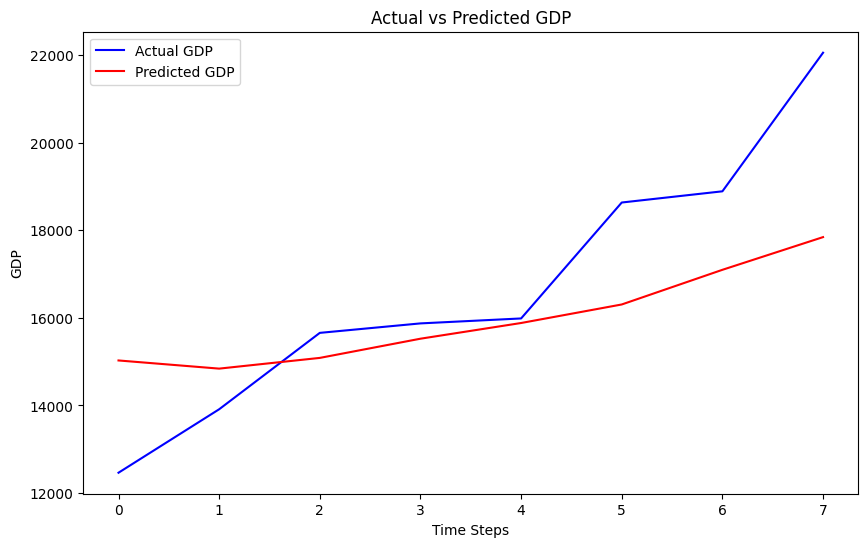

In [10]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label="Actual GDP", color="blue")
plt.plot(range(len(y_pred_rescaled)), y_pred_rescaled, label="Predicted GDP", color="red")
plt.title("Actual vs Predicted GDP")
plt.xlabel("Time Steps")
plt.ylabel("GDP")
plt.legend()
plt.show()

### Conclusion

The RNN-LSTM model performed well in predicting GDP growth, achieving a low test loss of <b> 0.010369033552706242 </b> (mean squared error), which indicates high accuracy and strong generalization to unseen data. This result demonstrates the model's ability to effectively capture temporal patterns in the dataset, making it a reliable tool for forecasting GDP trends. Further optimization or incorporating additional features could potentially enhance performance even further.